In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [237]:
#Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [249]:
#Metircs
def metrics(model, data, target, cv=skf):
    accuracy = cross_val_score(model, data, target, cv=skf, scoring = 'accuracy', error_score = 'raise').mean()
    precision = cross_val_score(model, data, target, cv=skf, scoring = 'precision_macro', error_score = 'raise').mean()
    recall = cross_val_score(model, data, target, cv=skf, scoring = 'recall_macro', error_score = 'raise').mean()
    f1 = cross_val_score(model, data, target, cv=skf, scoring = 'f1_macro', error_score = 'raise').mean()
    balanced = cross_val_score(model, data, target, cv=skf, scoring = 'balanced_accuracy', error_score = 'raise').mean()
    print(f'Accuracy : \t\t{accuracy}')
    print(f'Precision : \t\t{precision}')
    print(f'Recall : \t\t{recall}')
    print(f'F1 : \t\t\t{f1}')
    print(f'Balanced Accuracy : \t{balanced}')

In [239]:
#MinMaxScaler
def minMax(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scale = scaler.transform(data)

    scaled_df = pd.DataFrame(scale)
    
    return scaled_df

In [240]:
#SMOTE
def smote(data, target):
    smote = SMOTE(random_state=0)
    X_over, y_over = smote.fit_resample(data, target)
    return X_over, y_over

# DILI

1    54.447439
0    45.552561
Name: DILI, dtype: float64


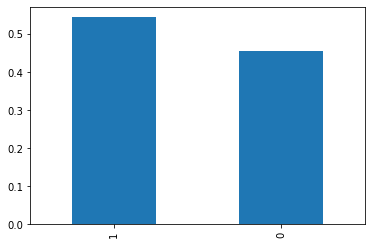

In [192]:
df_raw = pd.read_csv('DILI/final/DILI_GSD.csv') # Need to input Binary class Data
df_raw

df_raw.DILI.value_counts(normalize=True).plot(kind='bar')
print(df_raw.DILI.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [193]:
model = LogisticRegression()
metrics(model, X, y)

KeyboardInterrupt: 

In [52]:
model = LGBMClassifier()
metrics(model, X, y)

Accuracy : 		0.7147306897767924
Precision : 		0.7215341753193683
Recall : 		0.7755433119069484
F1 : 			0.7473243393455593
Balanced Accuracy : 	0.7087856539049935


In [53]:
model = RandomForestClassifier()
metrics(model, X, y)

Accuracy : 		0.720114878822996
Precision : 		0.7209510958650718
Recall : 		0.7977927422371867
F1 : 			0.755091948726458
Balanced Accuracy : 	0.7152715019391342


In [54]:
model = KNeighborsClassifier()
metrics(model, X, y)

Accuracy : 		0.6235410893334006
Precision : 		0.6419842223461327
Recall : 		0.697993402033806
F1 : 			0.6685925026878486
Balanced Accuracy : 	0.616245396329784


In [55]:
model = SVC()
metrics(model, X, y)

Accuracy : 		0.5539063838363479
Precision : 		0.5501054867420543
Recall : 		0.9917457402305887
F1 : 			0.7076732374783331
Balanced Accuracy : 	0.511158438080958


## Normalization - MinMaxScaling

In [63]:
X_scaled = minMax(X)

In [64]:
model = LogisticRegression()
metrics(model, X_scaled, y)

Accuracy : 		0.6769960195495541
Precision : 		0.6978907497754492
Recall : 		0.7177941026425875
F1 : 			0.7075385084025919
Balanced Accuracy : 	0.673004742878627


In [65]:
model = LGBMClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.7079860936161636
Precision : 		0.7171196461602578
Recall : 		0.7656293575485494
F1 : 			0.740173802615773
Balanced Accuracy : 	0.7023581602160149


In [66]:
model = RandomForestClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.7183181337229808
Precision : 		0.715075855588027
Recall : 		0.7969969050777131
F1 : 			0.7571152389692303
Balanced Accuracy : 	0.7122300955610148


In [67]:
model = KNeighborsClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.6684597168337785
Precision : 		0.6974564589540957
Recall : 		0.6905621875318845
F1 : 			0.6937903847270817
Balanced Accuracy : 	0.6663219170600942


In [68]:
model = SVC()
metrics(model, X_scaled, y)

Accuracy : 		0.7093475084395626
Precision : 		0.6999470875907022
Recall : 		0.8184641023024861
F1 : 			0.7542714453856151
Balanced Accuracy : 	0.698675059491486


## OverSampling - SMOTE

In [78]:
X_over, y_over = smote(X_scaled,y)

In [79]:
model = LogisticRegression()
metrics(model, X_over, y_over)

Accuracy : 		0.7009159069608929
Precision : 		0.7103870846560374
Recall : 		0.6806516341869877
F1 : 			0.6947103447729541
Balanced Accuracy : 	0.7008825630037752


In [80]:
model = LGBMClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.740516315924001
Precision : 		0.7385491205638128
Recall : 		0.7458422609937762
F1 : 			0.7417122815331352
Balanced Accuracy : 	0.7404720606740809


In [81]:
model = RandomForestClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.7446374712447815
Precision : 		0.7344505435834932
Recall : 		0.7664796109240555
F1 : 			0.7573048840603654
Balanced Accuracy : 	0.743791449852056


In [86]:
model = KNeighborsClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.6394351197069097
Precision : 		0.7170460990014569
Recall : 		0.46201067918239636
F1 : 			0.5614544668325201
Balanced Accuracy : 	0.6394075434479475


In [87]:
model = SVC()
metrics(model, X_over, y_over)

Accuracy : 		0.7273119195705888
Precision : 		0.719721900426946
Recall : 		0.7466721082882698
F1 : 			0.7325844030353256
Balanced Accuracy : 	0.7272812298064822


# AMES Mutagenicity

1    56.009281
0    43.990719
Name: Mutagenicity, dtype: float64


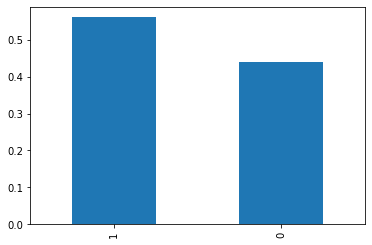

In [165]:
df_raw = pd.read_csv('AMES Mutagenesis/final/AMES_GSD.csv') # Need to input Binary class Data
categorical_features = ['fr_Al_OH_noTert','fr_COO','fr_NH2','fr_N_O','fr_Ndealkylation2','fr_Nhpyrrole','fr_alkyl_halide','fr_allylic_oxid','fr_lactam']
for var in categorical_features:
    df_raw[var] = df_raw[var].astype("category")
df_raw['Mutagenicity'] = df_raw['Mutagenicity'].astype('category')

df_raw.Mutagenicity.value_counts(normalize=True).plot(kind='bar')
print(df_raw.Mutagenicity.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]
y = y.astype('category')

In [166]:
model = LogisticRegression()
metrics(model, X, y)

Accuracy : 		0.7612529002320185
Precision : 		0.7798413186498722
Recall : 		0.7999227625269526
F1 : 			0.7895658873533165
Balanced Accuracy : 	0.755977316687465


In [107]:
model = LGBMClassifier()
metrics(model, X, y)

Accuracy : 		0.8157772621809747
Precision : 		0.8285267658400386
Recall : 		0.8463180252952724
F1 : 			0.8372690676408044
Balanced Accuracy : 	0.811610001832823


In [108]:
model = RandomForestClassifier()
metrics(model, X, y)

Accuracy : 		0.8293503480278422
Precision : 		0.8481704149873522
Recall : 		0.8508748216565293
F1 : 			0.8467502359791667
Balanced Accuracy : 	0.8268462973385757


In [109]:
model = KNeighborsClassifier()
metrics(model, X, y)

Accuracy : 		0.7054524361948956
Precision : 		0.7254035590835244
Recall : 		0.7630521674765876
F1 : 			0.7437185098815718
Balanced Accuracy : 	0.6975875241142919


In [110]:
model = SVC()
metrics(model, X, y)

Accuracy : 		0.7140371229698377
Precision : 		0.7058279890481417
Recall : 		0.8394801488966841
F1 : 			0.7668441590132506
Balanced Accuracy : 	0.6968972142761254


## Normalization - MinMaxScaling

In [116]:
X_scaled = minMax(X)

In [117]:
model = LogisticRegression()
metrics(model, X_scaled, y)

Accuracy : 		0.7603248259860789
Precision : 		0.7820504336289307
Recall : 		0.793707076883468
F1 : 			0.7876479791879755
Balanced Accuracy : 	0.7557675031432403


In [118]:
model = LGBMClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.8148491879350347
Precision : 		0.8274877403850682
Recall : 		0.8459050193630053
F1 : 			0.836512592172312
Balanced Accuracy : 	0.8106135064798174


In [119]:
model = RandomForestClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.8292343387470998
Precision : 		0.8525612816873492
Recall : 		0.8502515581587444
F1 : 			0.8474628071950934
Balanced Accuracy : 	0.8282491429875704


In [120]:
model = KNeighborsClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.7836426914153132
Precision : 		0.8207841878628228
Recall : 		0.7854152050547636
F1 : 			0.8026036207730665
Balanced Accuracy : 	0.7833992499874128


In [121]:
model = SVC()
metrics(model, X_scaled, y)

Accuracy : 		0.8097447795823666
Precision : 		0.8274383032185424
Recall : 		0.8345107757002328
F1 : 			0.8308987754196122
Balanced Accuracy : 	0.8063649647479233


## OverSampling - SMOTE

In [122]:
X_over, y_over = smote(X_scaled,y)

In [123]:
model = LogisticRegression()
metrics(model, X_over, y_over)

Accuracy : 		0.7712305920724628
Precision : 		0.7767764977886262
Recall : 		0.7613930636458233
F1 : 			0.768961180868976
Balanced Accuracy : 	0.7712303285810832


In [124]:
model = LGBMClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.8354392161025354
Precision : 		0.8387577627137812
Recall : 		0.8305740246087172
F1 : 			0.83462870519276
Balanced Accuracy : 	0.8354405217820402


In [125]:
model = RandomForestClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.8512838904953826
Precision : 		0.8687681507687868
Recall : 		0.8324365204518391
F1 : 			0.8483745448067974
Balanced Accuracy : 	0.8521138394533303


In [126]:
model = KNeighborsClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.7863497710344355
Precision : 		0.857723511102346
Recall : 		0.6866207532799107
F1 : 			0.762619779041156
Balanced Accuracy : 	0.7863511730441219


In [127]:
model = SVC()
metrics(model, X_over, y_over)

Accuracy : 		0.8314003943504314
Precision : 		0.8471471666731041
Recall : 		0.8088239521985863
F1 : 			0.8275042089709288
Balanced Accuracy : 	0.8314004655703237


# hERG

1    58.355514
0    41.644486
Name: hERG, dtype: float64


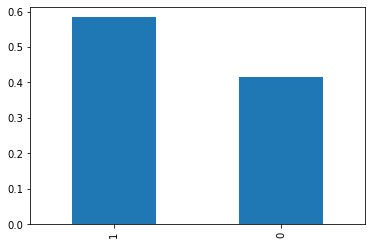

In [132]:
df_raw = pd.read_csv('hERG/final/hERG_GSD.csv') # Need to input Binary class Data
df_raw.hERG.value_counts(normalize=True).plot(kind='bar')
print(df_raw.hERG.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [133]:
model = LogisticRegression()
metrics(model, X, y)

Accuracy : 		0.679087125121909
Precision : 		0.7002033511674055
Recall : 		0.787725536048161
F1 : 			0.7412164553694041
Balanced Accuracy : 	0.6572969517790421


In [134]:
model = LGBMClassifier()
metrics(model, X, y)

Accuracy : 		0.8177115783101675
Precision : 		0.8249685436246509
Recall : 		0.8730276778096613
F1 : 			0.8482643555164447
Balanced Accuracy : 	0.8066131667179619


In [135]:
model = RandomForestClassifier()
metrics(model, X, y)

Accuracy : 		0.848213002413603
Precision : 		0.8512204362086866
Recall : 		0.8921374538177689
F1 : 			0.8729967261658353
Balanced Accuracy : 	0.8348637897949793


In [136]:
model = KNeighborsClassifier()
metrics(model, X, y)

Accuracy : 		0.6984403157085981
Precision : 		0.7255221699234221
Recall : 		0.7774898898615995
F1 : 			0.7505878341803579
Balanced Accuracy : 	0.6825786044307571


In [137]:
model = SVC()
metrics(model, X, y)

Accuracy : 		0.5850657984938911
Precision : 		0.584438131364452
Recall : 		1.0
F1 : 			0.7377228384066938
Balanced Accuracy : 	0.5018137700532763


## Normalization - MinMaxScaling

In [138]:
X_scaled = minMax(X)

In [139]:
model = LogisticRegression()
metrics(model, X_scaled, y)

Accuracy : 		0.7570683129871508
Precision : 		0.7806051610981466
Recall : 		0.8120081777591389
F1 : 			0.7959507575765242
Balanced Accuracy : 	0.746045781482827


In [140]:
model = LGBMClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.8173524093346682
Precision : 		0.8247344910074949
Recall : 		0.8727803849259983
F1 : 			0.8480104000143716
Balanced Accuracy : 	0.8062300797302602


In [141]:
model = RandomForestClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.8461270853867069
Precision : 		0.8525525314888064
Recall : 		0.8925059240130887
F1 : 			0.8731915667126604
Balanced Accuracy : 	0.8372311524563469


In [142]:
model = KNeighborsClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.7921013351131393
Precision : 		0.8170332544283878
Recall : 		0.8297577289472464
F1 : 			0.8232823743346224
Balanced Accuracy : 	0.7845452191548234


In [144]:
model = SVC()
metrics(model, X_scaled, y)

Accuracy : 		0.8060573935673467
Precision : 		0.8139278410656692
Recall : 		0.8656307715917837
F1 : 			0.8389591902876393
Balanced Accuracy : 	0.7941036618597399


## OverSampling - SMOTE

In [145]:
X_over, y_over = smote(X_scaled,y)

In [146]:
model = LogisticRegression()
metrics(model, X_over, y_over)

Accuracy : 		0.7658410644090595
Precision : 		0.7699232531027214
Recall : 		0.7582622033909894
F1 : 			0.7640249521779277
Balanced Accuracy : 	0.765842471014311


In [147]:
model = LGBMClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.8446741548697702
Precision : 		0.8468490883453779
Recall : 		0.8415921559153141
F1 : 			0.8442046794428604
Balanced Accuracy : 	0.8446747319854163


In [148]:
model = RandomForestClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.8769726925042605
Precision : 		0.8789207339638875
Recall : 		0.8770974880968933
F1 : 			0.8772311136573032
Balanced Accuracy : 	0.8757403781795748


In [149]:
model = KNeighborsClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.8083701758752438
Precision : 		0.8648833939484024
Recall : 		0.7310150100322658
F1 : 			0.7922919483004541
Balanced Accuracy : 	0.808369059747632


In [150]:
model = SVC()
metrics(model, X_over, y_over)

Accuracy : 		0.835798810272467
Precision : 		0.8464160993721304
Recall : 		0.8205136094656573
F1 : 			0.8332493369080302
Balanced Accuracy : 	0.835799690485036


# Acute Oral Toxicity - EPA_category

3    49.906335
2    22.411444
4    19.337534
1     8.344687
Name: EPA_category, dtype: float64


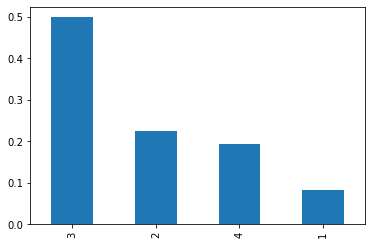

In [250]:
df_raw = pd.read_csv('Acute Oral Toxicity/final/AOT_EPA_GSD.csv') # Need to input Binary class Data


df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]
y = y.astype('int').astype('category')

y.value_counts(normalize=True).plot(kind='bar')
print(y.value_counts(normalize=True)*100)

In [251]:
model = LogisticRegression(multi_class='multinomial')
metrics(model, X, y)

Accuracy : 		0.5651385598134115
Precision : 		0.5402035065370215
Recall : 		0.4325352299495274
F1 : 			0.4550325529741678
Balanced Accuracy : 	0.4325352299495274


In [252]:
model = LGBMClassifier()
metrics(model, X, y)

Accuracy : 		0.6367495175372753
Precision : 		0.6459816137320482
Recall : 		0.5517580847315623
F1 : 			0.5826635526028828
Balanced Accuracy : 	0.5517580847315623


In [253]:
model = RandomForestClassifier()
metrics(model, X, y)

Accuracy : 		0.6479048317345523
Precision : 		0.6708179156439249
Recall : 		0.55075669742441
F1 : 			0.5784439284056345
Balanced Accuracy : 	0.5463463260967387


In [254]:
model = KNeighborsClassifier()
metrics(model, X, y)

Accuracy : 		0.5241832944969878
Precision : 		0.4749958231783783
Recall : 		0.45560414427278806
F1 : 			0.45964561914191193
Balanced Accuracy : 	0.45560414427278806


In [255]:
model = SVC()
metrics(model, X, y)

Accuracy : 		0.5180518296596544
Precision : 		0.5837597871601025
Recall : 		0.29677839806498535
F1 : 			0.25642936558660534
Balanced Accuracy : 	0.29677839806498535


## Normalization - MinMaxScaling

In [258]:
X_scaled = minMax(X)

In [260]:
models = [LogisticRegression(multi_class='multinomial')]#,LGBMClassifier(), RandomForestClassifier(), KNeighborsClassifier(),SVC()]
for model in models:
    print(str(model))
    metrics(model, X_scaled, y)
    print('\n')

LogisticRegression(multi_class='multinomial')
Accuracy : 		0.5624150477603649
Precision : 		0.5327999716173413
Recall : 		0.4958225419529728
F1 : 			0.5099525917931855
Balanced Accuracy : 	0.4958225419529728




## OverSampling - SMOTE

In [264]:
X_over, y_over = smote(X_scaled,y)

In [ ]:
models = [LogisticRegression(multi_class='multinomial'),LGBMClassifier(), RandomForestClassifier(), KNeighborsClassifier(),SVC()]
for model in models:
    print(str(model))
    metrics(model, X_over, y_over)
    print('\n')

LogisticRegression(multi_class='multinomial')
Accuracy : 		0.6826052022852119
Precision : 		0.6747518803493141
Recall : 		0.6826070953681963
F1 : 			0.6771845645565129
Balanced Accuracy : 	0.6826070953681963


LGBMClassifier()
Accuracy : 		0.8035318936848057
Precision : 		0.807735038922039
Recall : 		0.8035331724320536
F1 : 			0.8043126129663131
Balanced Accuracy : 	0.8035331724320536


RandomForestClassifier()
Accuracy : 		0.8376553996464022
Precision : 		0.8399792399468448
Recall : 		0.8394051380754112
F1 : 			0.8384193674849545
Balanced Accuracy : 	0.8363767097579498


KNeighborsClassifier()
Accuracy : 		0.7505540252147754
Precision : 		0.7558755994951817
Recall : 		0.7505534072955491
F1 : 			0.7228679525797324
Balanced Accuracy : 	0.7505534072955491


SVC()
